In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
filepath = 'E2.csv'
data = pd.read_csv(filepath)

x_values = data['x']
y_values = data['y']

Text(0.5, 1.0, 'x vs y')

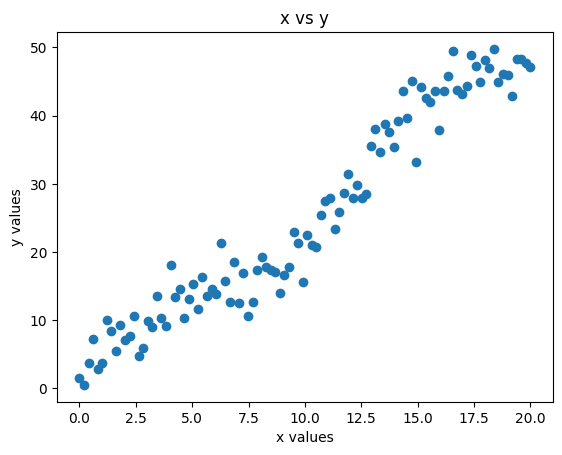

In [36]:
plt.scatter(x_values, y_values)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("x vs y")

In [37]:
xi_xbar_yi_ybar = 0
xi_xbar_sq = 0
yi_ybar_sq = 0

xbar = 0
ybar = 0

for i in range(0, 100):
    xbar += x_values[i]
    ybar += y_values[i]

xbar /= 100
ybar /= 100

for i in range(0, 100):
    xi_xbar_yi_ybar += (x_values[i] - xbar) * (y_values[i] - ybar)
    xi_xbar_sq += (x_values[i] - xbar)**2
    yi_ybar_sq += (y_values[i] - ybar)**2

pearson_corr_coeff = xi_xbar_yi_ybar / np.sqrt(xi_xbar_sq * yi_ybar_sq)

print(pearson_corr_coeff)

0.9674196412653445


In [6]:
SD_y = np.sqrt(yi_ybar_sq / 99)
print(SD_y)

15.061425869440942


In [7]:
#SD reduced to 5
y_values_red5 = []

y_values_red5 = y_values * (5 / SD_y)

In [8]:
#SD reduced to 10
y_values_red10 = []

y_values_red10 = y_values * (10 / SD_y)

In [9]:
#Original data
y_values_orig = y_values

In [40]:
#SD increased to 20
mean_20 = 0
sigma_noise_20 = np.sqrt(20**2 - SD_y**2)

y_values_inc20 = []

y_values_inc20 = y_values + np.random.normal(mean_20, sigma_noise_20, size = 100)

In [43]:
#SD increased to 25
mean_25 = 0
sigma_noise_25 = np.sqrt(25**2 - SD_y**2)

y_values_inc25 = []

y_values_inc25 = y_values + np.random.normal(mean_25, sigma_noise_25, size = 100)

In [44]:
print("Reduced to 5:", y_values_red5.std(ddof=1))
print("Reduced to 10:", y_values_red10.std(ddof=1))
print("Original:", y_values_orig.std(ddof=1))
print("Increased to 20:", y_values_inc20.std(ddof=1))
print("Increased to 25:", y_values_inc25.std(ddof=1))

# ddof=1 is an arguument in the SD function that induces the Bessel correction for samples.

Reduced to 5: 5.000000000000002
Reduced to 10: 10.000000000000004
Original: 15.061425869440946
Increased to 20: 20.104206078564435
Increased to 25: 25.41653127046244


In [15]:
#Choosing indices for train/test data was not easy, as the data provided was not random, hence simply choosing the last 20 would not work as all values are close together. Hence, I had to shuffle the values. That is what is done below.
np.random.seed(25)

shuffle_indexes = np.random.permutation(100)

x_values_shuff = x_values[shuffle_indexes].reset_index(drop=True)

y_values_red5_shuff = y_values_red5[shuffle_indexes].reset_index(drop=True)
y_values_red10_shuff = y_values_red10[shuffle_indexes].reset_index(drop=True)
y_values_orig_shuff = y_values_orig[shuffle_indexes].reset_index(drop=True)
y_values_inc20_shuff = y_values_inc20[shuffle_indexes].reset_index(drop=True)
y_values_inc25_shuff = y_values_inc25[shuffle_indexes].reset_index(drop=True)


In [89]:
x_train_orig = x_values_shuff[0:80]
x_train_orig = sm.add_constant(x_train_orig)

y_train_orig = y_values_orig_shuff[0:80]

model = sm.OLS(y_train_orig, x_train_orig).fit()

y_train_pred_orig = model.predict(x_train_orig)

r2_train_orig = model.rsquared
rmse_train_orig = np.sqrt(model.mse_resid)
fval_train_orig = model.fvalue
fpval_train_orig = model.f_pvalue

print("--------------------------------------------------")
print("TRAIN DATA STATS:")
print(f"R2 on original train_data: {r2_train_orig}")
print(f"RMSE on original train_data: {rmse_train_orig}")
print(f"F statistic on original train_data: {fval_train_orig}")
print(f"F statistic p-value on original train_data: {fpval_train_orig}")

#The below coefficients printing i took from the web(because i wanted the CI also included). I did learn it though, i didnt blindly cut copy paste it.....
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")

x_test_orig = x_values_shuff[80:100]
x_test_orig = sm.add_constant(x_test_orig)
y_test_orig = y_values_orig_shuff[80:100]

y_test_pred_orig = model.predict(x_test_orig)
r2_test_orig = r2_score(y_test_orig, y_test_pred_orig)
rmse_test_orig = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

train_errors_orig = y_train_orig - y_train_pred_orig
test_errors_orig = y_test_orig - y_test_pred_orig

CI_0_width_orig = 0.0
CI_1_width_orig = 0.0

print("\n--------------------------------------------------")
print("TEST DATA STATS:")
print(f"R2 on original test_data: {r2_test_orig}")
print(f"RMSE on original test_data: {rmse_test_orig}")
print("\nRest of the statistics will be identical to the train data as those are intinsic to the data used to train the model\n")
print(f"F statistic on original train_data: {fval_train_orig}")
print(f"F statistic p-value on original train_data: {fpval_train_orig}")
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    if name == "const":
        CI_0_width_orig = ci[1] - ci[0]
    else:
        CI_1_width_orig = ci[1] - ci[0]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")
print("--------------------------------------------------")

pval_0_orig = model.pvalues[0]
pval_1_orig = model.pvalues[1]

--------------------------------------------------
TRAIN DATA STATS:
R2 on original train_data: 0.9349264426566539
RMSE on original train_data: 3.841057551874891
F statistic on original train_data: 1120.6435533015413
F statistic p-value on original train_data: 4.914874705727151e-48

Coefficients:
const: Value=0.5622642044778441, P-value=0.5230459481151172, CI=(-1.1825433436417077, 2.3070717525973956)
x: Value=2.496386042404972, P-value=4.914874705727205e-48, CI=(2.3479238405877005, 2.644848244222244)

--------------------------------------------------
TEST DATA STATS:
R2 on original test_data: 0.9362638860774684
RMSE on original test_data: 3.8115630761169683

Rest of the statistics will be identical to the train data as those are intinsic to the data used to train the model

F statistic on original train_data: 1120.6435533015413
F statistic p-value on original train_data: 4.914874705727151e-48

Coefficients:
const: Value=0.5622642044778441, P-value=0.5230459481151172, CI=(-1.1825433436

C:\Users\soura\AppData\Local\Temp\ipykernel_38016\327944663.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_0_orig = model.pvalues[0]
C:\Users\soura\AppData\Local\Temp\ipykernel_38016\327944663.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_1_orig = model.pvalues[1]


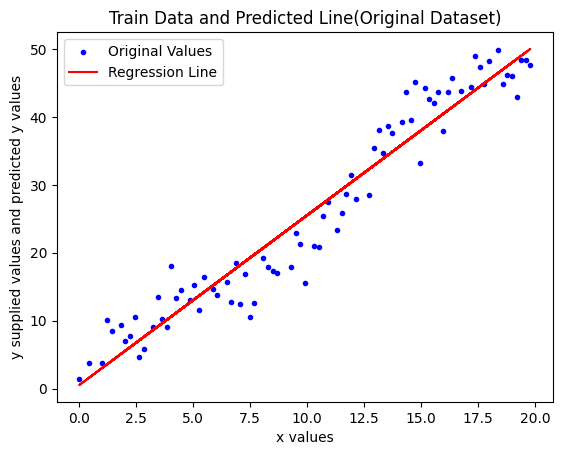

In [50]:
#Train Data and Predicted Line (Original)
plt.scatter(x_values_shuff[0:80], y_train_orig, marker=".", color = 'blue', label = "Original Values")
plt.plot(x_values_shuff[0:80], y_train_pred_orig, color = 'red', label = "Regression Line")
plt.xlabel("x values")
plt.ylabel("y supplied values and predicted y values")
plt.title("Train Data and Predicted Line(Original Dataset)")
plt.legend()
plt.show()

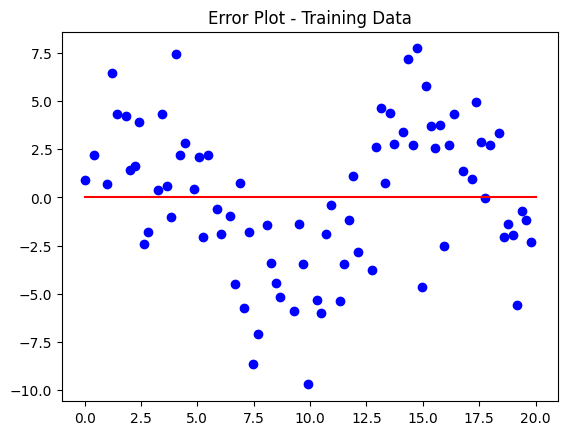

In [51]:
#Error Plot-Train Data(Original)
plt.scatter(x_values_shuff[0:80], train_errors_orig, marker="o", color="blue")
plt.plot([0,20],[0,0], color="red")
plt.title("Error Plot - Training Data")
plt.show()

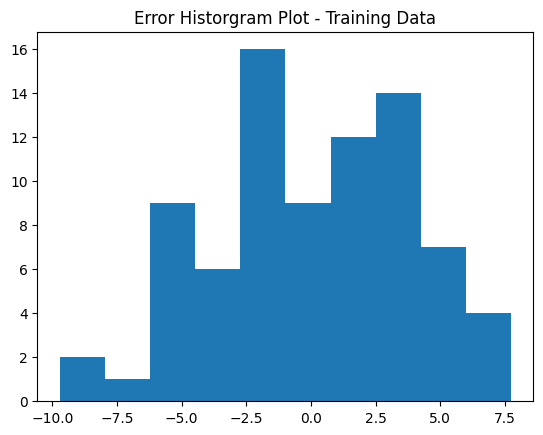

In [53]:
#Histogram for errors-Train Data(Original)
plt.hist(train_errors_orig)
plt.title("Error Historgram Plot - Training Data")
plt.show()

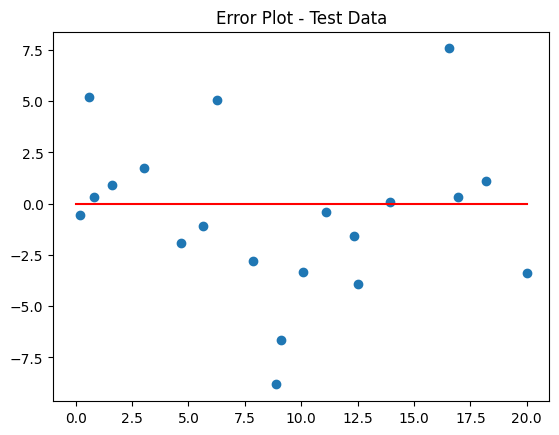

In [54]:
#Error Plot-Test Data(Original)
plt.scatter(x_values_shuff[80:100], test_errors_orig, marker="o")
plt.plot([0,20],[0,0], color = "red")
plt.title("Error Plot - Test Data")
plt.show()

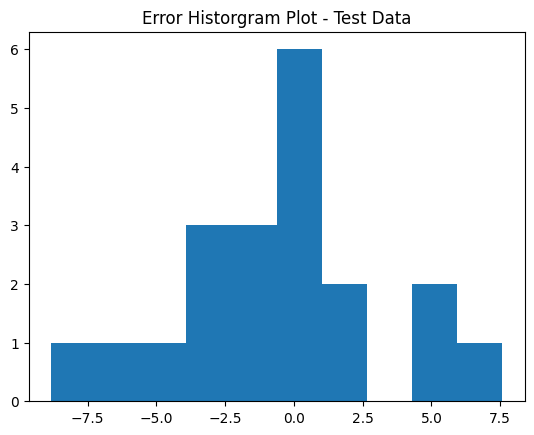

In [55]:
#Histogram for errors-Test Data(Original)
plt.hist(test_errors_orig)
plt.title("Error Historgram Plot - Test Data")
plt.show()

In [90]:
x_train_red5 = x_values_shuff[0:80]
x_train_red5 = sm.add_constant(x_train_red5)

y_train_red5 = y_values_red5_shuff[0:80]

model = sm.OLS(y_train_red5, x_train_red5).fit()

y_train_pred_red5 = model.predict(x_train_red5)

r2_train_red5 = model.rsquared
rmse_train_red5 = np.sqrt(model.mse_resid)
fval_train_red5 = model.fvalue
fpval_train_red5 = model.f_pvalue

print("--------------------------------------------------")
print("TRAIN DATA STATS:")
print(f"R2 on SD 5(reduced) train_data: {r2_train_red5}")
print(f"RMSE on SD 5(reduced) train_data: {rmse_train_red5}")
print(f"F statistic on SD 5(reduced) train_data: {fval_train_red5}")
print(f"F statistic p-value on SD 5(reduced) train_data: {fpval_train_red5}")

#The below coefficients printing i took from the web(because i wanted the CI also included). I did learn it though, i didnt blindly cut copy paste it.....
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")

x_test_red5 = x_values_shuff[80:100]
x_test_red5 = sm.add_constant(x_test_red5)
y_test_red5 = y_values_red5_shuff[80:100]

y_test_pred_red5 = model.predict(x_test_red5)
r2_test_red5 = r2_score(y_test_red5, y_test_pred_red5)
rmse_test_red5 = np.sqrt(mean_squared_error(y_test_red5, y_test_pred_red5))

train_errors_red5 = y_train_red5 - y_train_pred_red5
test_errors_red5 = y_test_red5 - y_test_pred_red5

CI_0_width_red5 = 0.0
CI_1_width_red5 = 0.0

print("\n--------------------------------------------------")
print("TEST DATA STATS:")
print(f"R2 on SD 5(reduced) test_data: {r2_test_red5}")
print(f"RMSE on SD 5(reduced) test_data: {rmse_test_red5}")
print("\nRest of the statistics will be identical to the train data as those are intinsic to the data used to train the model\n")
print(f"F statistic on SD 5(reduced) train_data: {fval_train_red5}")
print(f"F statistic p-value on SD 5(reduced) train_data: {fpval_train_red5}")
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    if name == "const":
        CI_0_width_red5 = ci[1] - ci[0]
    else:
        CI_1_width_red5 = ci[1] - ci[0]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")
print("--------------------------------------------------")

pval_0_red5 = model.pvalues[0]
pval_1_red5 = model.pvalues[1]

--------------------------------------------------
TRAIN DATA STATS:
R2 on SD 5(reduced) train_data: 0.9349264426566539
RMSE on SD 5(reduced) train_data: 1.2751307828258973
F statistic on SD 5(reduced) train_data: 1120.643553301542
F statistic p-value on SD 5(reduced) train_data: 4.914874705727068e-48

Coefficients:
const: Value=0.18665703013506021, P-value=0.5230459481151184, CI=(-0.3925735032966049, 0.7658875635667253)
x: Value=0.8287349630920549, P-value=4.914874705727066e-48, CI=(0.7794493897657951, 0.8780205364183146)

--------------------------------------------------
TEST DATA STATS:
R2 on SD 5(reduced) test_data: 0.9362638860774684
RMSE on SD 5(reduced) test_data: 1.2653393872390537

Rest of the statistics will be identical to the train data as those are intinsic to the data used to train the model

F statistic on SD 5(reduced) train_data: 1120.643553301542
F statistic p-value on SD 5(reduced) train_data: 4.914874705727068e-48

Coefficients:
const: Value=0.18665703013506021, P-

C:\Users\soura\AppData\Local\Temp\ipykernel_38016\540045389.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_0_red5 = model.pvalues[0]
C:\Users\soura\AppData\Local\Temp\ipykernel_38016\540045389.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_1_red5 = model.pvalues[1]


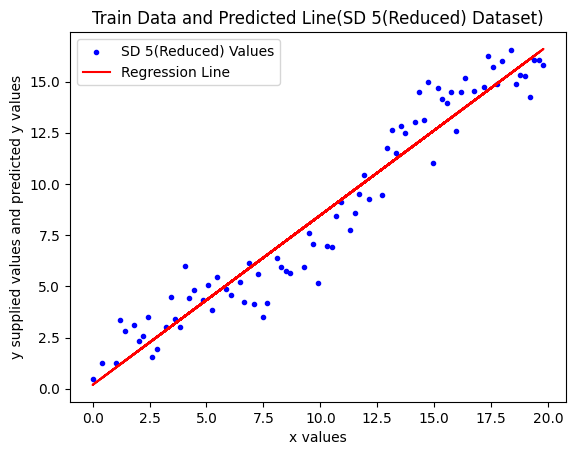

In [56]:
#Train Data and Predicted Line (SD 5(Reduced))
plt.scatter(x_values_shuff[0:80], y_train_red5, marker=".", color = 'blue', label = "SD 5(Reduced) Values")
plt.plot(x_values_shuff[0:80], y_train_pred_red5, color = 'red', label = "Regression Line")
plt.xlabel("x values")
plt.ylabel("y supplied values and predicted y values")
plt.title("Train Data and Predicted Line(SD 5(Reduced) Dataset)")
plt.legend()
plt.show()

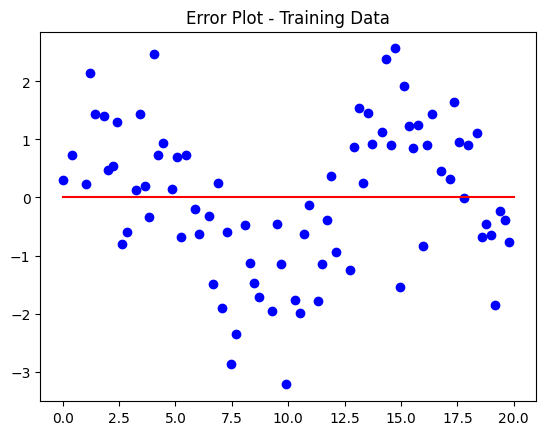

In [57]:
#Error Plot-Train Data(SD 5(Reduced))
plt.scatter(x_values_shuff[0:80], train_errors_red5, marker="o", color="blue")
plt.plot([0,20],[0,0], color="red")
plt.title("Error Plot - Training Data")
plt.show()

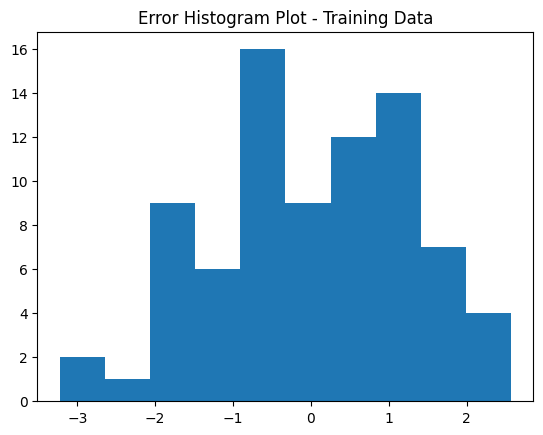

In [58]:
#Histogram for errors-Train Data(SD 5(Reduced))
plt.hist(train_errors_red5)
plt.title("Error Histogram Plot - Training Data")
plt.show()

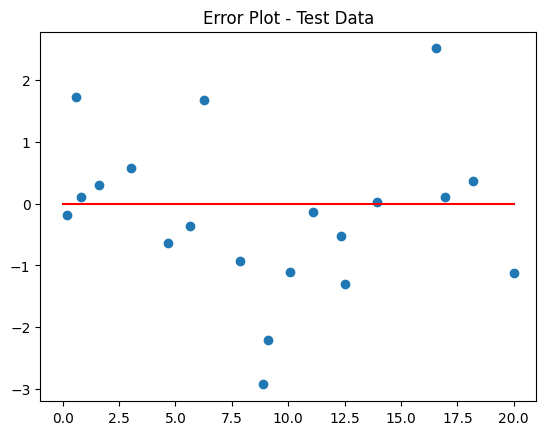

In [59]:
#Error Plot-Test Data(SD 5(Reduced))
plt.scatter(x_values_shuff[80:100], test_errors_red5, marker="o")
plt.plot([0,20],[0,0], color = "red")
plt.title("Error Plot - Test Data")
plt.show()

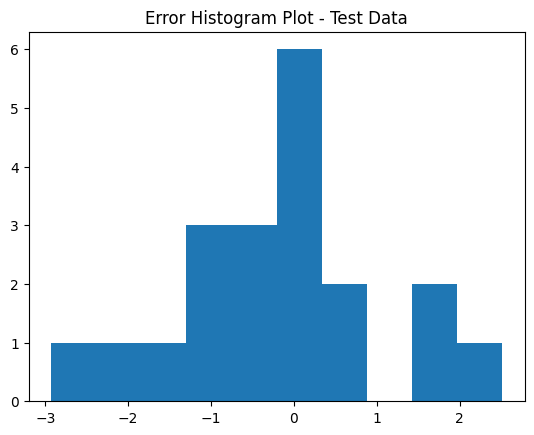

In [61]:
#Histogram for errors-Test Data(SD 5(Reduced))
plt.hist(test_errors_red5)
plt.title("Error Histogram Plot - Test Data")
plt.show()

In [91]:
x_train_red10 = x_values_shuff[0:80]
x_train_red10 = sm.add_constant(x_train_red10)

y_train_red10 = y_values_red10_shuff[0:80]

model = sm.OLS(y_train_red10, x_train_red10).fit()

y_train_pred_red10 = model.predict(x_train_red10)

r2_train_red10 = model.rsquared
rmse_train_red10 = np.sqrt(model.mse_resid)
fval_train_red10 = model.fvalue
fpval_train_red10 = model.f_pvalue

print("--------------------------------------------------")
print("TRAIN DATA STATS:")
print(f"R2 on SD 10(reduced) train_data: {r2_train_red10}")
print(f"RMSE on SD 10(reduced) train_data: {rmse_train_red10}")
print(f"F statistic on SD 10(reduced) train_data: {fval_train_red10}")
print(f"F statistic p-value on SD 10(reduced) train_data: {fpval_train_red10}")

#The below coefficients printing i took from the web(because i wanted the CI also included). I did learn it though, i didnt blindly cut copy paste it.....
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")

x_test_red10 = x_values_shuff[80:100]
x_test_red10 = sm.add_constant(x_test_red10)
y_test_red10 = y_values_red10_shuff[80:100]

y_test_pred_red10 = model.predict(x_test_red10)
r2_test_red10 = r2_score(y_test_red10, y_test_pred_red10)
rmse_test_red10 = np.sqrt(mean_squared_error(y_test_red10, y_test_pred_red10))

train_errors_red10 = y_train_red10 - y_train_pred_red10
test_errors_red10 = y_test_red10 - y_test_pred_red10

CI_0_width_red10 = 0.0
CI_1_width_red10 = 0.0

print("\n--------------------------------------------------")
print("TEST DATA STATS:")
print(f"R2 on SD 10(reduced) test_data: {r2_test_red10}")
print(f"RMSE on SD 10(reduced) test_data: {rmse_test_red10}")
print("\nRest of the statistics will be identical to the train data as those are intinsic to the data used to train the model\n")
print(f"F statistic on SD 10(reduced) train_data: {fval_train_red10}")
print(f"F statistic p-value on SD 10(reduced) train_data: {fpval_train_red10}")
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    if name == "const":
        CI_0_width_red10 = ci[1] - ci[0]
    else:
        CI_1_width_red10 = ci[1] - ci[0]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")
print("--------------------------------------------------")

pval_0_red10 = model.pvalues[0]
pval_1_red10 = model.pvalues[1]

--------------------------------------------------
TRAIN DATA STATS:
R2 on SD 10(reduced) train_data: 0.9349264426566539
RMSE on SD 10(reduced) train_data: 2.5502615656517946
F statistic on SD 10(reduced) train_data: 1120.643553301542
F statistic p-value on SD 10(reduced) train_data: 4.914874705727068e-48

Coefficients:
const: Value=0.37331406027012043, P-value=0.5230459481151184, CI=(-0.7851470065932098, 1.5317751271334505)
x: Value=1.6574699261841097, P-value=4.914874705727066e-48, CI=(1.5588987795315903, 1.7560410728366291)

--------------------------------------------------
TEST DATA STATS:
R2 on SD 10(reduced) test_data: 0.9362638860774684
RMSE on SD 10(reduced) test_data: 2.5306787744781074

Rest of the statistics will be identical to the train data as those are intinsic to the data used to train the model

F statistic on SD 10(reduced) train_data: 1120.643553301542
F statistic p-value on SD 10(reduced) train_data: 4.914874705727068e-48

Coefficients:
const: Value=0.3733140602701

C:\Users\soura\AppData\Local\Temp\ipykernel_38016\3136563607.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_0_red10 = model.pvalues[0]
C:\Users\soura\AppData\Local\Temp\ipykernel_38016\3136563607.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_1_red10 = model.pvalues[1]


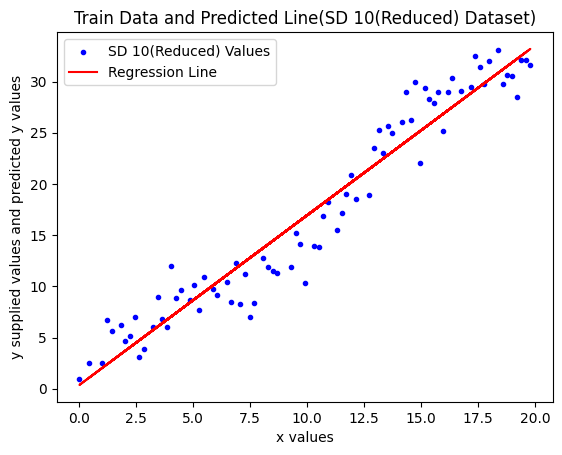

In [62]:
#Train Data and Predicted Line (SD 10(Reduced))
plt.scatter(x_values_shuff[0:80], y_train_red10, marker=".", color = 'blue', label = "SD 10(Reduced) Values")
plt.plot(x_values_shuff[0:80], y_train_pred_red10, color = 'red', label = "Regression Line")
plt.xlabel("x values")
plt.ylabel("y supplied values and predicted y values")
plt.title("Train Data and Predicted Line(SD 10(Reduced) Dataset)")
plt.legend()
plt.show()

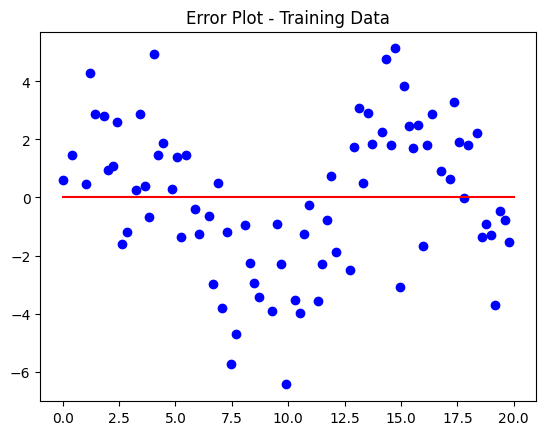

In [63]:
#Error Plot-Train Data(SD 10(Reduced))
plt.scatter(x_values_shuff[0:80], train_errors_red10, marker="o", color="blue")
plt.plot([0,20],[0,0], color="red")
plt.title("Error Plot - Training Data")
plt.show()

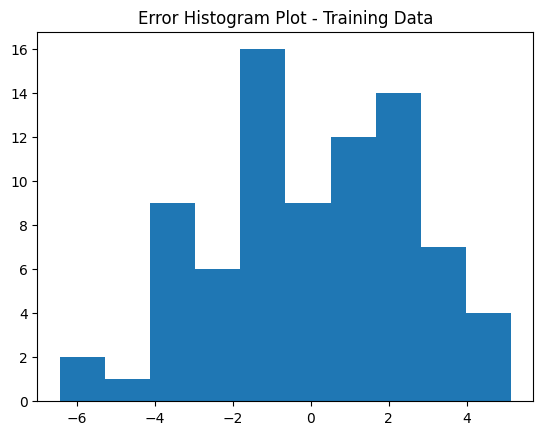

In [64]:
#Histogram for errors-Train Data(SD 10(Reduced))
plt.hist(train_errors_red10)
plt.title("Error Histogram Plot - Training Data")
plt.show()

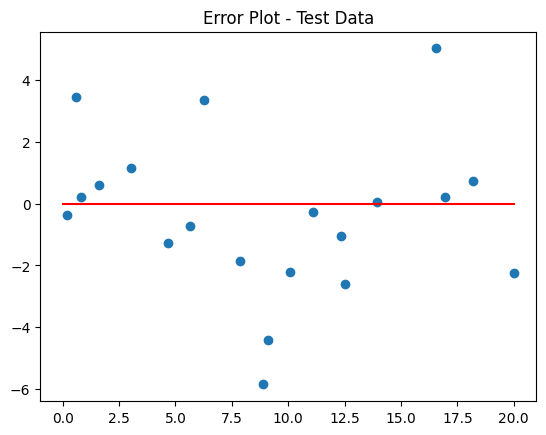

In [65]:
#Error Plot-Test Data(SD 10(Reduced))
plt.scatter(x_values_shuff[80:100], test_errors_red10, marker="o")
plt.plot([0,20],[0,0], color = "red")
plt.title("Error Plot - Test Data")
plt.show()

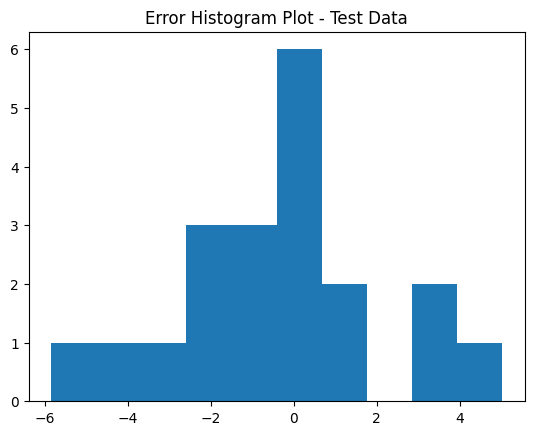

In [66]:
#Histogram for errors-Test Data(SD 10(Reduced))
plt.hist(test_errors_red10)
plt.title("Error Histogram Plot - Test Data")
plt.show()

In [92]:
x_train_inc20 = x_values_shuff[0:80]
x_train_inc20 = sm.add_constant(x_train_inc20)

y_train_inc20 = y_values_inc20_shuff[0:80]

model = sm.OLS(y_train_inc20, x_train_inc20).fit()

y_train_pred_inc20 = model.predict(x_train_inc20)

r2_train_inc20 = model.rsquared
rmse_train_inc20 = np.sqrt(model.mse_resid)
fval_train_inc20 = model.fvalue
fpval_train_inc20 = model.f_pvalue

print("--------------------------------------------------")
print("TRAIN DATA STATS:")
print(f"R2 on SD 20(Increased) train_data: {r2_train_inc20}")
print(f"RMSE on SD 20(Increased) train_data: {rmse_train_inc20}")
print(f"F statistic on SD 20(Increased) train_data: {fval_train_inc20}")
print(f"F statistic p-value on SD 20(Increased) train_data: {fpval_train_inc20}")

#The below coefficients printing i took from the web(because i wanted the CI also included). I did learn it though, i didnt blindly cut copy paste it.....
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")

x_test_inc20 = x_values_shuff[80:100]
x_test_inc20 = sm.add_constant(x_test_inc20)
y_test_inc20 = y_values_inc20_shuff[80:100]

y_test_pred_inc20 = model.predict(x_test_inc20)
r2_test_inc20 = r2_score(y_test_inc20, y_test_pred_inc20)
rmse_test_inc20 = np.sqrt(mean_squared_error(y_test_inc20, y_test_pred_inc20))

train_errors_inc20 = y_train_inc20 - y_train_pred_inc20
test_errors_inc20 = y_test_inc20 - y_test_pred_inc20

CI_0_width_inc20 = 0.0
CI_1_width_inc20 = 0.0

print("\n--------------------------------------------------")
print("TEST DATA STATS:")
print(f"R2 on SD 20(Increased) test_data: {r2_test_inc20}")
print(f"RMSE on SD 20(Increased) test_data: {rmse_test_inc20}")
print("\nRest of the statistics will be identical to the train data as those are intinsic to the data used to train the model\n")
print(f"F statistic on SD 20(Increased) train_data: {fval_train_inc20}")
print(f"F statistic p-value on SD 20(Increased) train_data: {fpval_train_inc20}")
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    if name == "const":
        CI_0_width_inc20 = ci[1] - ci[0]
    else:
        CI_1_width_inc20 = ci[1] - ci[0]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")
print("--------------------------------------------------")

pval_0_inc20 = model.pvalues[0]
pval_1_inc20 = model.pvalues[1]

--------------------------------------------------
TRAIN DATA STATS:
R2 on SD 20(Increased) train_data: 0.5949676788609988
RMSE on SD 20(Increased) train_data: 13.66901503460519
F statistic on SD 20(Increased) train_data: 114.57722391303068
F statistic p-value on SD 20(Increased) train_data: 5.69809242989339e-17

Coefficients:
const: Value=-2.4934822675567783, P-value=0.42643731570455823, CI=(-8.702657809875129, 3.715693274761573)
x: Value=2.8406226899730376, P-value=5.698092429893316e-17, CI=(2.31229630035143, 3.3689490795946453)

--------------------------------------------------
TEST DATA STATS:
R2 on SD 20(Increased) test_data: 0.5503823149465026
RMSE on SD 20(Increased) test_data: 12.339299435540275

Rest of the statistics will be identical to the train data as those are intinsic to the data used to train the model

F statistic on SD 20(Increased) train_data: 114.57722391303068
F statistic p-value on SD 20(Increased) train_data: 5.69809242989339e-17

Coefficients:
const: Value=-2.

C:\Users\soura\AppData\Local\Temp\ipykernel_38016\625905683.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_0_inc20 = model.pvalues[0]
C:\Users\soura\AppData\Local\Temp\ipykernel_38016\625905683.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_1_inc20 = model.pvalues[1]


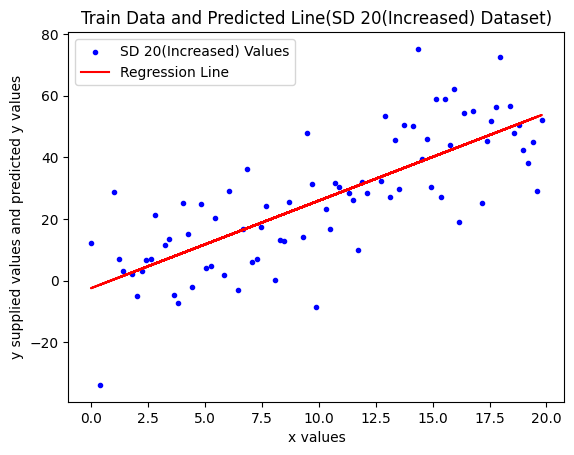

In [67]:
#Train Data and Predicted Line (SD 20(Increased))
plt.scatter(x_values_shuff[0:80], y_train_inc20, marker=".", color = 'blue', label = "SD 20(Increased) Values")
plt.plot(x_values_shuff[0:80], y_train_pred_inc20, color = 'red', label = "Regression Line")
plt.xlabel("x values")
plt.ylabel("y supplied values and predicted y values")
plt.title("Train Data and Predicted Line(SD 20(Increased) Dataset)")
plt.legend()
plt.show()

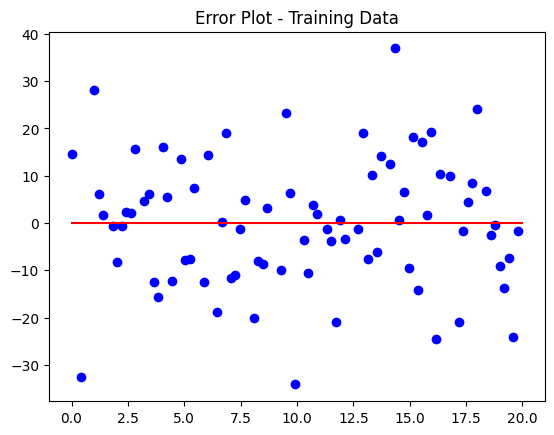

In [68]:
#Error Plot-Train Data(SD 20(Increased))
plt.scatter(x_values_shuff[0:80], train_errors_inc20, marker="o", color="blue")
plt.plot([0,20],[0,0], color="red")
plt.title("Error Plot - Training Data")
plt.show()

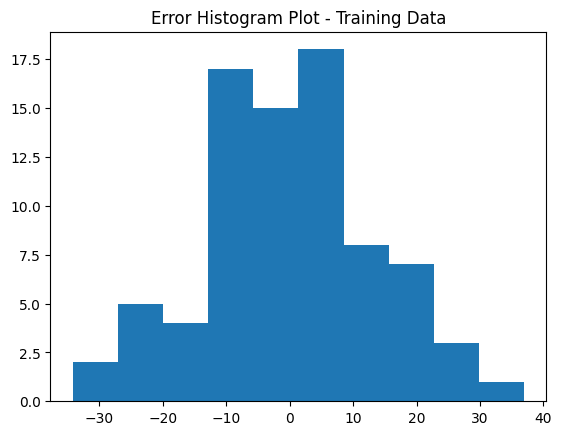

In [69]:
#Histogram for errors-Train Data(SD 20(Increased))
plt.hist(train_errors_inc20)
plt.title("Error Histogram Plot - Training Data")
plt.show()

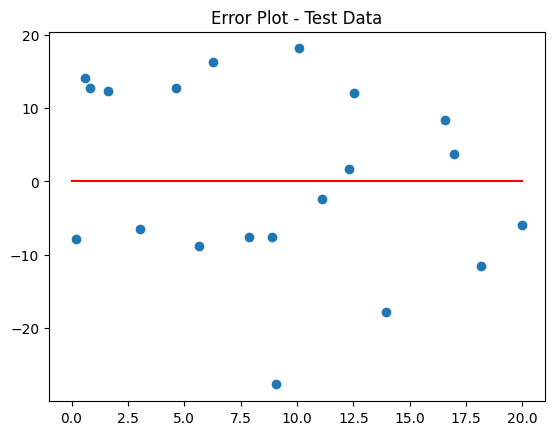

In [70]:
#Error Plot-Test Data(SD 20(Increased))
plt.scatter(x_values_shuff[80:100], test_errors_inc20, marker="o")
plt.plot([0,20],[0,0], color = "red")
plt.title("Error Plot - Test Data")
plt.show()

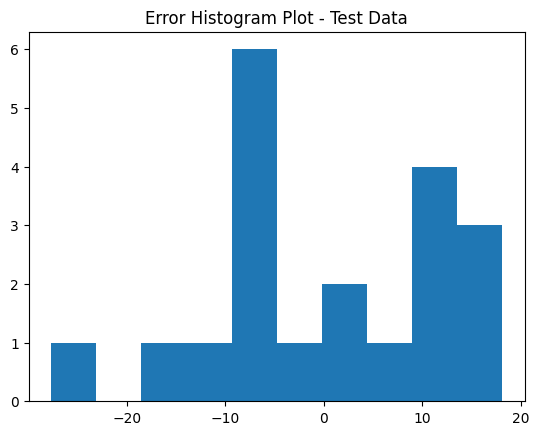

In [71]:
#Histogram for errors-Test Data(SD 20(Increased))
plt.hist(test_errors_inc20)
plt.title("Error Histogram Plot - Test Data")
plt.show()

In [109]:
x_train_inc25 = x_values_shuff[0:80]
x_train_inc25 = sm.add_constant(x_train_inc25)

y_train_inc25 = y_values_inc25_shuff[0:80]

model = sm.OLS(y_train_inc25, x_train_inc25).fit()

y_train_pred_inc25 = model.predict(x_train_inc25)

r2_train_inc25 = model.rsquared
rmse_train_inc25 = np.sqrt(model.mse_resid)
fval_train_inc25 = model.fvalue
fpval_train_inc25 = model.f_pvalue

print("--------------------------------------------------")
print("TRAIN DATA STATS:")
print(f"R2 on SD 25(Increased) train_data: {r2_train_inc25}")
print(f"RMSE on SD 25(Increased) train_data: {rmse_train_inc25}")
print(f"F statistic on SD 25(Increased) train_data: {fval_train_inc25}")
print(f"F statistic p-value on SD 25(Increased) train_data: {fpval_train_inc25}")

CI_0_width_inc25 = 0.0
CI_1_width_inc25 = 0.0

#The below coefficients printing i took from the web(because i wanted the CI also included). I did learn it though, i didnt blindly cut copy paste it.....
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    if name == 'const':
        CI_0_width_inc25 = ci[1] - ci[0]
    else:
        CI_1_width_inc25 = ci[1] - ci[0]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")

x_test_inc25 = x_values_shuff[80:100]
x_test_inc25 = sm.add_constant(x_test_inc25)
y_test_inc25 = y_values_inc25_shuff[80:100]

y_test_pred_inc25 = model.predict(x_test_inc25)
r2_test_inc25 = r2_score(y_test_inc25, y_test_pred_inc25)
rmse_test_inc25 = np.sqrt(mean_squared_error(y_test_inc25, y_test_pred_inc25))

train_errors_inc25 = y_train_inc25 - y_train_pred_inc25
test_errors_inc25 = y_test_inc25 - y_test_pred_inc25

print("\n--------------------------------------------------")
print("TEST DATA STATS:")
print(f"R2 on SD 25(Increased) test_data: {r2_test_inc25}")
print(f"RMSE on SD 25(Increased) test_data: {rmse_test_inc25}")
print("\nRest of the statistics will be identical to the train data as those are intinsic to the data used to train the model\n")
print(f"F statistic on SD 25(Increased) train_data: {fval_train_inc25}")
print(f"F statistic p-value on SD 25(Increased) train_data: {fpval_train_inc25}")
print("\nCoefficients:")
for name in model.params.index:
    coef = model.params[name]
    pval = model.pvalues[name]
    ci = model.conf_int().loc[name]
    print(f"{name}: Value={coef}, P-value={pval}, CI=({ci[0]}, {ci[1]})")
print("--------------------------------------------------")

pval_0_inc25 = model.pvalues[0]
pval_1_inc25 = model.pvalues[1]

--------------------------------------------------
TRAIN DATA STATS:
R2 on SD 25(Increased) train_data: 0.3846830902648769
RMSE on SD 25(Increased) train_data: 19.934992668328604
F statistic on SD 25(Increased) train_data: 48.76394678244229
F statistic p-value on SD 25(Increased) train_data: 8.482180041088439e-10

Coefficients:
const: Value=-0.41696850363217886, P-value=0.9271950690277082, CI=(-9.472476058427755, 8.638539051163399)
x: Value=2.702667924109346, P-value=8.482180041088353e-10, CI=(1.9321528082120079, 3.473183040006684)

--------------------------------------------------
TEST DATA STATS:
R2 on SD 25(Increased) test_data: 0.46153088561981714
RMSE on SD 25(Increased) test_data: 21.157277834654025

Rest of the statistics will be identical to the train data as those are intinsic to the data used to train the model

F statistic on SD 25(Increased) train_data: 48.76394678244229
F statistic p-value on SD 25(Increased) train_data: 8.482180041088439e-10

Coefficients:
const: Value=-

C:\Users\soura\AppData\Local\Temp\ipykernel_38016\3756297422.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_0_inc25 = model.pvalues[0]
C:\Users\soura\AppData\Local\Temp\ipykernel_38016\3756297422.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_1_inc25 = model.pvalues[1]


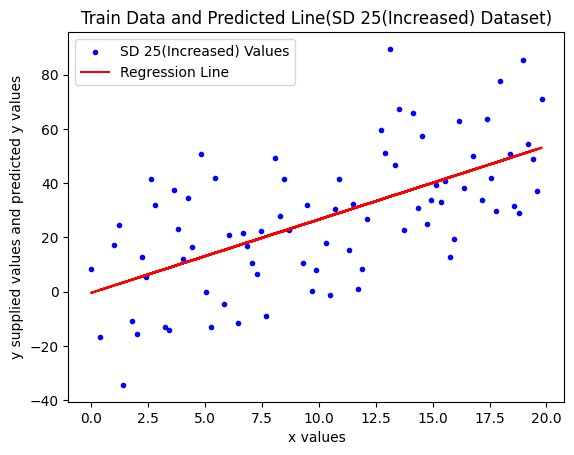

In [72]:
#Train Data and Predicted Line (SD 25(Increased))
plt.scatter(x_values_shuff[0:80], y_train_inc25, marker=".", color = 'blue', label = "SD 25(Increased) Values")
plt.plot(x_values_shuff[0:80], y_train_pred_inc25, color = 'red', label = "Regression Line")
plt.xlabel("x values")
plt.ylabel("y supplied values and predicted y values")
plt.title("Train Data and Predicted Line(SD 25(Increased) Dataset)")
plt.legend()
plt.show()

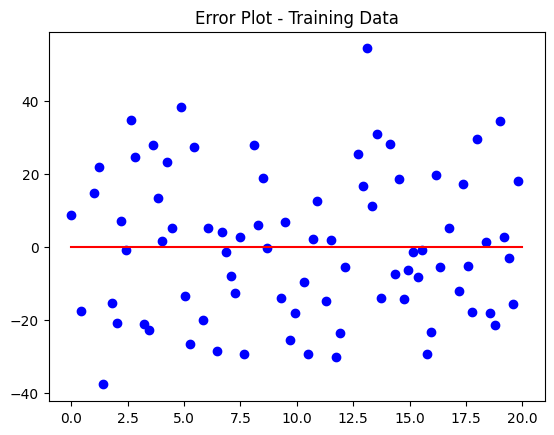

In [73]:
#Error Plot-Train Data(SD 25(Increased))
plt.scatter(x_values_shuff[0:80], train_errors_inc25, marker="o", color="blue")
plt.plot([0,20],[0,0], color="red")
plt.title("Error Plot - Training Data")
plt.show()

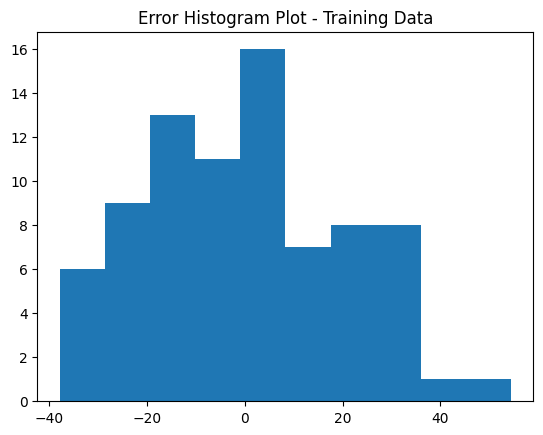

In [74]:
#Histogram for errors-Train Data(SD 25(Increased))
plt.hist(train_errors_inc25)
plt.title("Error Histogram Plot - Training Data")
plt.show()

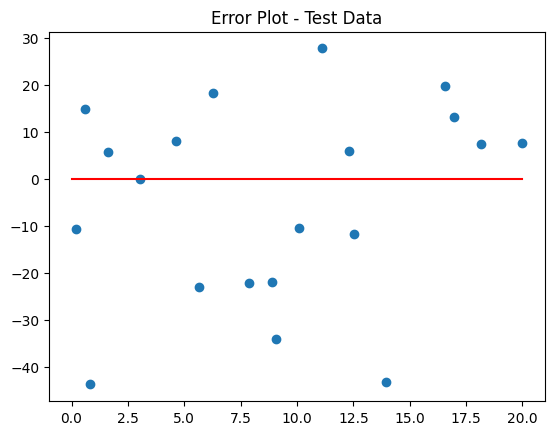

In [75]:
#Error Plot-Test Data(SD 25(Increased))
plt.scatter(x_values_shuff[80:100], test_errors_inc25, marker="o")
plt.plot([0,20],[0,0], color = "red")
plt.title("Error Plot - Test Data")
plt.show()

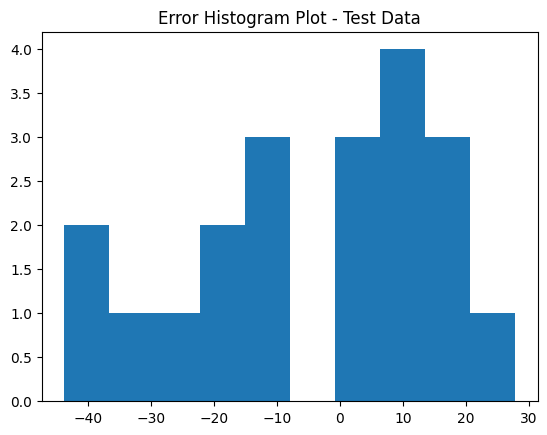

In [76]:
#Histogram for errors-Test Data(SD 25(Increased))
plt.hist(test_errors_inc25)
plt.title("Error Histogram Plot - Test Data")
plt.show()

In [106]:
#For finding the relationship between the SD and the metrics for d)
r2_train_inc25 = model.rsquared
rmse_train_inc25 = np.sqrt(model.mse_resid)
fval_train_inc25 = model.fvalue
fpval_train_inc25 = model.f_pvalue
pval = model.pvalues[name]

r2_train_list = [r2_train_orig, r2_train_red5, r2_train_red10, r2_train_inc20, r2_train_inc25]
rmse_train_list = [rmse_train_orig, rmse_train_red5, rmse_train_red10, rmse_train_inc20, rmse_train_inc25]
fval_list = [fval_train_orig, fval_train_red5, fval_train_red10, fval_train_inc20, fval_train_inc25]
fpval_list = [fpval_train_orig, fpval_train_red5, fpval_train_red10, fpval_train_inc20, fpval_train_inc25]
const_pval = [pval_0_orig, pval_0_red5, pval_0_red10, pval_0_inc20, pval_0_inc25]
slope_pval = [pval_1_orig, pval_1_red5, pval_1_red10, pval_1_inc20, pval_1_inc25]

SD_list = [float(SD_y), np.std(y_values_red5_shuff), np.std(y_values_red10_shuff), np.std(y_values_inc20_shuff), np.std(y_values_inc25_shuff)]

r2_test_list = [r2_test_orig, r2_test_red5, r2_test_red10, r2_test_inc20, r2_test_inc25]
rmse_test_list = [rmse_test_orig, rmse_test_red5, rmse_test_red10, rmse_test_inc20, rmse_test_inc25]

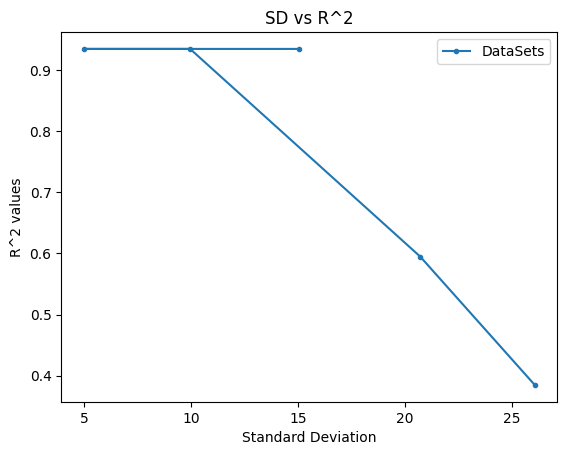

In [82]:
#R2,SD
plt.plot(SD_list, r2_train_list, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("R^2 values")
plt.legend()
plt.title("SD vs R^2")
plt.show()

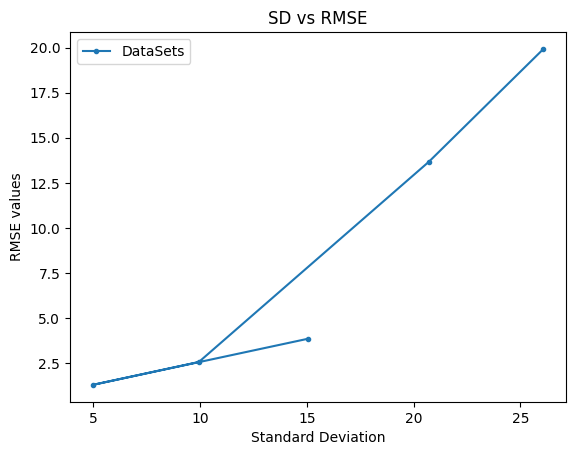

In [83]:
#RMSE,SD
plt.plot(SD_list, rmse_train_list, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("RMSE values")
plt.legend()
plt.title("SD vs RMSE")
plt.show()

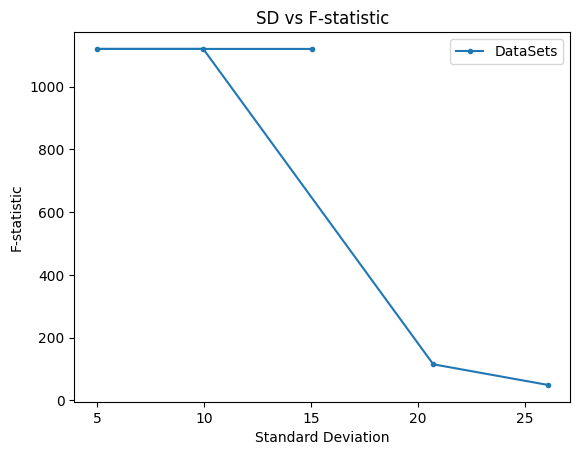

In [84]:
#F-statistic,SD
plt.plot(SD_list, fval_list, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("F-statistic")
plt.legend()
plt.title("SD vs F-statistic")
plt.show()

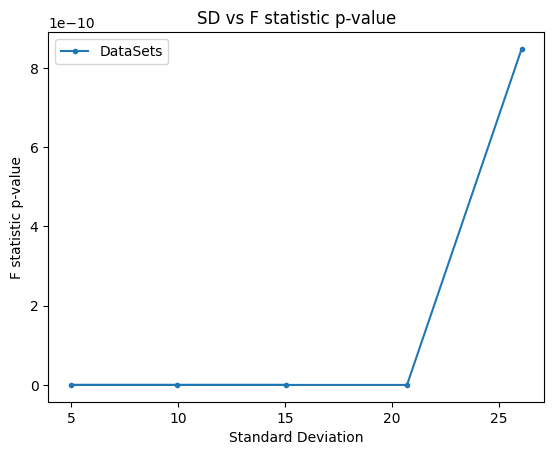

In [26]:
#F statistic p-value,SD
plt.plot(SD_list, fpval_list, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("F statistic p-value")
plt.legend()
plt.title("SD vs F statistic p-value")
plt.show()

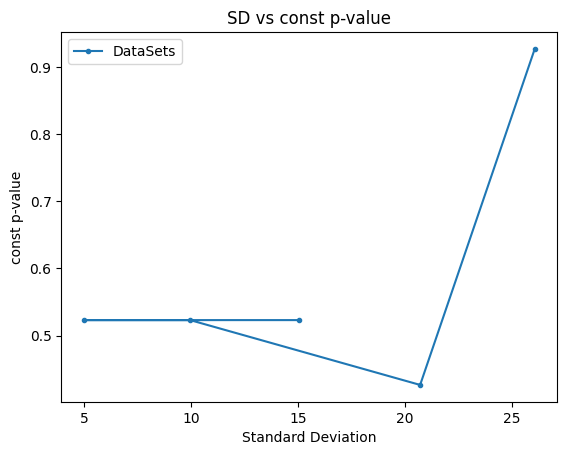

In [85]:
#const p-value,SD
plt.plot(SD_list, const_pval, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("const p-value")
plt.legend()
plt.title("SD vs const p-value")
plt.show()

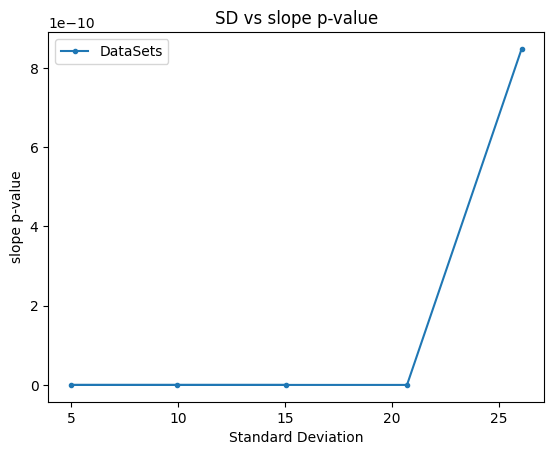

In [86]:
#slope p-value,SD
plt.plot(SD_list, slope_pval, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("slope p-value")
plt.legend()
plt.title("SD vs slope p-value")
plt.show()

In [110]:
#CI intervals vs the SD
CI_0_width_list = [CI_0_width_orig, CI_0_width_red5, CI_0_width_red10, CI_0_width_inc20, CI_0_width_inc25]
CI_1_width_list = [CI_1_width_orig, CI_1_width_red5, CI_1_width_red10, CI_1_width_inc20, CI_1_width_inc25]

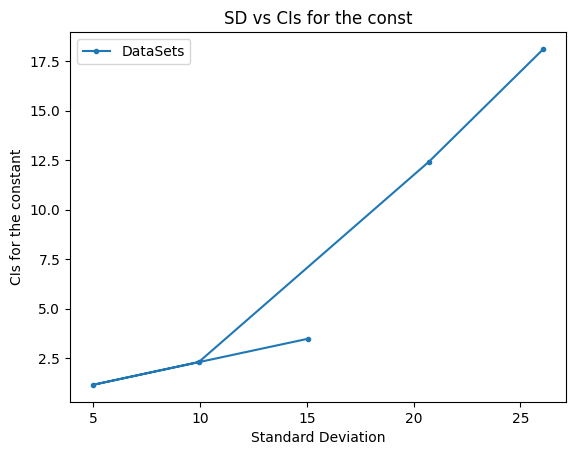

In [111]:
#const CI vs SD
plt.plot(SD_list, CI_0_width_list, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("CIs for the constant")
plt.legend()
plt.title("SD vs CIs for the const")
plt.show()

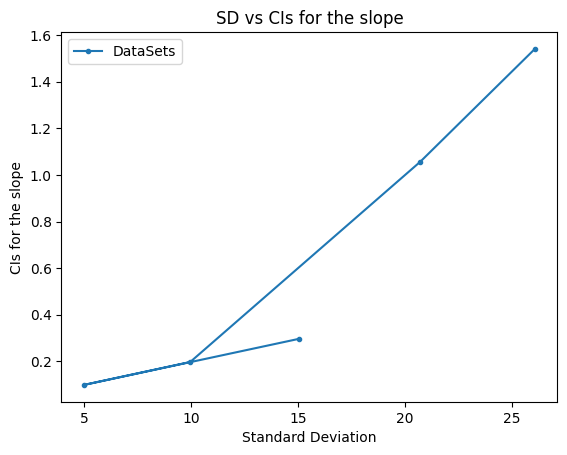

In [112]:
#slope CI vs SD
plt.plot(SD_list, CI_1_width_list, marker = ".", label = "DataSets")
plt.xlabel("Standard Deviation")
plt.ylabel("CIs for the slope")
plt.legend()
plt.title("SD vs CIs for the slope")
plt.show()